# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean, cosine

In [221]:
ratings = pd.read_csv(r'C:\Users\jwkon\Desktop\School\MSDS600 - Introduction to Data Science\Week 6\Data\ratings.csv')
movies = pd.read_csv(r'C:\Users\jwkon\Desktop\School\MSDS600 - Introduction to Data Science\Week 6\Data\movies.csv')

In [222]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [194]:
user2 = ratings[ratings['userId'] == 2]
user2 = user2.set_index('movieId')

In [195]:
user2.head()

,userId,rating,timestamp
movieId,,,
318,2,3.0,1445714835
333,2,4.0,1445715029
1704,2,4.5,1445715228
3578,2,4.0,1445714885
6874,2,4.0,1445714952


#### 1. How many movies has this user watched?

In [196]:
num_movies = pd.unique(user2.index)
print('User 2 has watched', len(num_movies), 'movies')

User 2 has watched 29 movies


#### 2. Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings

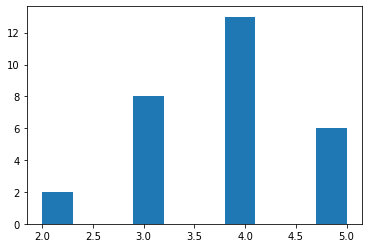

In [197]:
user2['rating'] = user2['rating'].astype(int)
num_movies = len(pd.unique(user2['rating']))
plt.hist(user2['rating'])
plt.show()

#### 3. What are some of user 2's top movies?

In [198]:
user2Movies = user2.merge(movies, left_on='movieId', right_on='movieId', how='inner')

In [214]:
#View user 2's top 5 movies
top_movies = user2Movies.sort_values(by='rating', ascending=False)
top_movies.head()

,movieId,userId,rating,timestamp,title,genres
28,131724,2,5,1445714851,The Jinx: The Life and Deaths of Robert Durst ...,Documentary
27,122882,2,5,1445715272,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller
22,106782,2,5,1445714966,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
18,89774,2,5,1445715189,Warrior (2011),Drama
16,80906,2,5,1445715172,Inside Job (2010),Documentary


#### 4. Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.

In [315]:
from scipy.spatial.distance import pdist, squareform
#Transform ratings to "wide" format to calculate similarities between users
wide = ratings.pivot(index = 'userId', columns='movieId', values='rating')
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [316]:
#Fill missing values with -1
wide.fillna(-1, inplace=True)

In [317]:
#Create an array of euclidean distances for each user
euclidean_distances = squareform(pdist(wide, metric=euclidean)) 
#Create dataframe from euclidean_distances array
euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide.index, index=wide.index)
#Sort euclidean distances
euclidean_df.loc[2].sort_values()

userId
2        0.000000
442     29.000000
461     30.495901
189     30.809901
508     31.488093
          ...    
448    171.200175
610    171.373860
599    185.184368
474    206.630709
414    232.408046
Name: 2, Length: 610, dtype: float64

##### Most similar user to user 2 is user 442 based off of the euclidean distance

In [318]:
print('Euclidean distance from user 2 to user 442 is:', round(euclidean_df.loc[2].sort_values().loc[442],2))

Euclidean distance from user 2 to user 442 is: 29.0


In [319]:
#Check cosine distance
cosine_distances = squareform(pdist(wide, metric='cosine'))
cosine_df = pd.DataFrame(data=cosine_distances, columns=wide.index, index=wide.index)
cosine_df.loc[2].sort_values()

userId
2      0.000000
442    0.042025
461    0.046059
189    0.046957
508    0.049443
         ...   
610    0.762312
448    0.817785
599    0.936812
474    0.975777
414    1.084648
Name: 2, Length: 610, dtype: float64

In [320]:
print('Cosine distance from user 2 to user 442 is:', round(cosine_df.loc[2].sort_values().loc[442],2))

Cosine distance from user 2 to user 442 is: 0.04


#### 5. Recommend a few movies for user 2 using similarity metrics.

In [350]:
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,-1.0,4.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [348]:
watchedby_442 = (wide.loc[442] == 5.0) & (wide.loc[2] == -1.0)
print(wide.loc[2][watchedby_442])

Series([], Name: 2, dtype: float64)


In [351]:
#Checking method results to user 5 since the no movies were returned in above code
watchedby_442 = (wide.loc[5] == 4.0) & (wide.loc[2] == -1.0)
print(wide.loc[2][watchedby_442])
##we see that user 5 rated movie 1 as 5. This was not seen by user 2, so this confirms our above code was correct and indeed user 442 and 2 have seen the same movies.

movieId
1     -1.0
21    -1.0
34    -1.0
36    -1.0
50    -1.0
110   -1.0
232   -1.0
261   -1.0
367   -1.0
457   -1.0
474   -1.0
531   -1.0
588   -1.0
Name: 2, dtype: float64


# Analysis/Summary

For both parts of the assignment, write a short analysis and summary of what you did, the results, and the significance. Do this in a markdown cell here at the bottom, like this one.

Part 1
I filtered the user dataframe to only include user 2. This made it much eaiser to perform the EDA. User 2 watched 29 unique movies and gave most of them a rating of 4. Their top 2 movies were The Jinx and Mad Max.

Part 2
This section was more involved than part 1 but I did not have any issues setting up the code. What was found was that user 2 is most similar to user 442. This was supported by both distance metrics. There were not any recommendations given to User 2 based off of movies seen by User 442 since they have seen the same moveis. These results made made me question my code so I validated User 2 against User 5 becuase I could seen the data eaiser using wide.head().